In [181]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
raw_data = pd.read_csv('./Market_Basket_Optimisation.csv', header=None)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
0     7501 non-null object
1     5747 non-null object
2     4389 non-null object
3     3345 non-null object
4     2529 non-null object
5     1864 non-null object
6     1369 non-null object
7     981 non-null object
8     654 non-null object
9     395 non-null object
10    256 non-null object
11    154 non-null object
12    87 non-null object
13    47 non-null object
14    25 non-null object
15    8 non-null object
16    4 non-null object
17    4 non-null object
18    3 non-null object
19    1 non-null object
dtypes: object(20)
memory usage: 1.1+ MB


In [183]:
raw_data.insert(0, 'Transaction', range(1, 7502))
raw_data = raw_data.fillna(value='none',axis=1)
data = pd.DataFrame(columns=['Transaction', 'Items'])

In [184]:
index = 0
for i in range(len(raw_data['Transaction'])):
    for j in range(0,20):
        if raw_data[j][i] != 'none':
            raw_data[j][i] = raw_data[j][i].strip()
            data.loc[index] = [i+1, raw_data[j][i]]
            index += 1            

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [185]:
data.drop_duplicates(inplace=True)

In [186]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

pd.options.display.max_columns=100
hot_encoded_df=data.groupby(['Transaction','Items'])['Items'].count().unstack().reset_index().fillna(0).set_index('Transaction')
hot_encoded_df = hot_encoded_df.applymap(encode_units)
frequent_itemsets = apriori(hot_encoded_df, min_support=0.003, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
print('-'*20, '频繁项集', '-'*20)
print(frequent_itemsets)

-------------------- 频繁项集 --------------------
       support                                 itemsets
69    0.238368                          (mineral water)
34    0.179709                                   (eggs)
96    0.174110                              (spaghetti)
40    0.170911                           (french fries)
23    0.163845                              (chocolate)
...        ...                                      ...
992   0.003066        (spaghetti, cereals, ground beef)
995   0.003066               (chocolate, eggs, chicken)
1009  0.003066  (spaghetti, chicken, frozen vegetables)
1017  0.003066                (chicken, pancakes, milk)
565   0.003066             (fresh bread, grated cheese)

[1443 rows x 2 columns]


In [189]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by='lift', ascending=False)
print('-'*20, '关联规则', '-'*20)
print(rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.6) ])

-------------------- 关联规则 --------------------
                                   antecedents      consequents  \
4452  (soup, frozen vegetables, mineral water)           (milk)   
4856                    (cereals, ground beef)      (spaghetti)   
2339                     (tomatoes, olive oil)      (spaghetti)   
4450           (soup, milk, frozen vegetables)  (mineral water)   
3912      (olive oil, milk, frozen vegetables)  (mineral water)   
3178    (ground beef, milk, frozen vegetables)  (mineral water)   
1802                 (soup, frozen vegetables)  (mineral water)   
2444                          (soup, pancakes)  (mineral water)   
4467                 (spaghetti, shrimp, milk)  (mineral water)   
2773            (chocolate, eggs, ground beef)  (mineral water)   
4173                  (spaghetti, light cream)  (mineral water)   
4405    (chocolate, shrimp, frozen vegetables)  (mineral water)   

      antecedent support  consequent support   support  confidence      lift  \
4

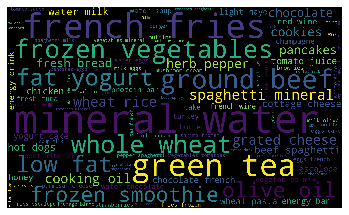

In [105]:
#Word_Cloud
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

Transaction = " ".join(str(data['Transaction']))
Items = " ".join(data['Items'])
all_word = Transaction + Items

cut_text = word_tokenize(all_word)
cut_text = " ".join(cut_text)
wc = WordCloud(
		max_words=100,
		width=2000,
		height=1200,
    )
wordcloud = wc.generate(cut_text)
# 写词云图片
wordcloud.to_file("wordcloud.jpg")
# 显示词云文件
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


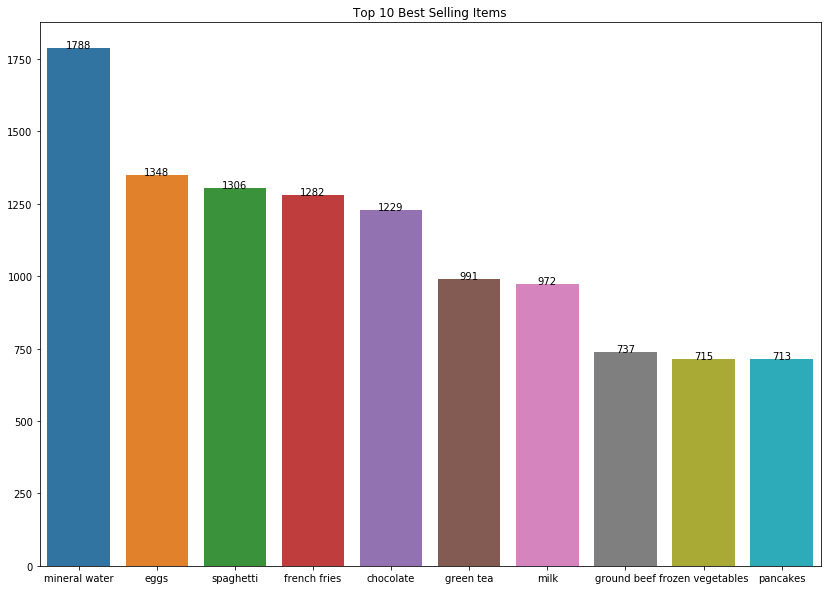

In [163]:
top_10 = data['Items'].value_counts()[:10]
f, ax= plt.subplots(figsize = (14, 10))
bar_chart = sns.barplot(x=top_10.index, y=top_10.values, ax=ax)
ax.set_title('Top 10 Best Selling Items')
for index,row in top_10.to_frame().reset_index().iterrows():
    bar_chart.text(row.name, row.Items, row.Items, color="black",ha="center")
plt.show()
#fig = bar_chart.get_figure()
#fig.savefig("temp.png")